<a href="https://colab.research.google.com/github/dipenpadhiyar/SciforTechnologies/blob/main/Logistic_Regression_%26_Naive_Baye's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

In [3]:
class NaiveBayesScratch:
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.classes = np.unique(y)
        self.parameters = []

        for i, c in enumerate(self.classes):
            X_where_c = X[np.where(y == c)]
            self.parameters.append([])
            for col in X_where_c.T:
                parameters = {"mean": col.mean(), "var": col.var()}
                self.parameters[i].append(parameters)

    def _calculate_likelihood(self, mean, var, x):
        eps = 1e-4
        coeff = 1.0 / np.sqrt(2.0 * np.pi * var + eps)
        exponent = np.exp(-(np.power(x - mean, 2) / (2 * var + eps)))
        return coeff * exponent

    def _calculate_prior(self, c):
        return np.mean(self.y == c)

    def _classify(self, sample):
        posteriors = []
        for i, c in enumerate(self.classes):
            prior = self._calculate_prior(c)
            posterior = np.log(prior)
            for feature_value, params in zip(sample, self.parameters[i]):
                likelihood = self._calculate_likelihood(params["mean"], params["var"], feature_value)
                posterior += np.log(likelihood)
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        y_pred = [self._classify(sample) for sample in X]
        return y_pred

In [4]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

In [15]:
import pandas as pd
# Create a DataFrame for features
X_df = pd.DataFrame(X, columns=iris.feature_names)

# Create a DataFrame for target labels
y_df = pd.DataFrame(y, columns=['target'])

# Concatenate features and target labels along columns
iris_df = pd.concat([X_df, y_df], axis=1)

# Display the DataFrame
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Logistic Regression
logreg_scratch = LogisticRegressionScratch()
logreg_scratch.fit(X_train, y_train)
logreg_scratch_predictions = logreg_scratch.predict(X_test)
logreg_scratch_accuracy = accuracy_score(y_test, logreg_scratch_predictions)
print("Logistic Regression (Scratch) Accuracy:", logreg_scratch_accuracy)

Logistic Regression (Scratch) Accuracy: 0.3


In [9]:
# Naive Bayes (Gaussian)
naive_bayes_scratch = NaiveBayesScratch()
naive_bayes_scratch.fit(X_train, y_train)
naive_bayes_scratch_predictions = naive_bayes_scratch.predict(X_test)
naive_bayes_scratch_accuracy = accuracy_score(y_test, naive_bayes_scratch_predictions)
print("Naive Bayes (Scratch) Accuracy:", naive_bayes_scratch_accuracy)

Naive Bayes (Scratch) Accuracy: 1.0


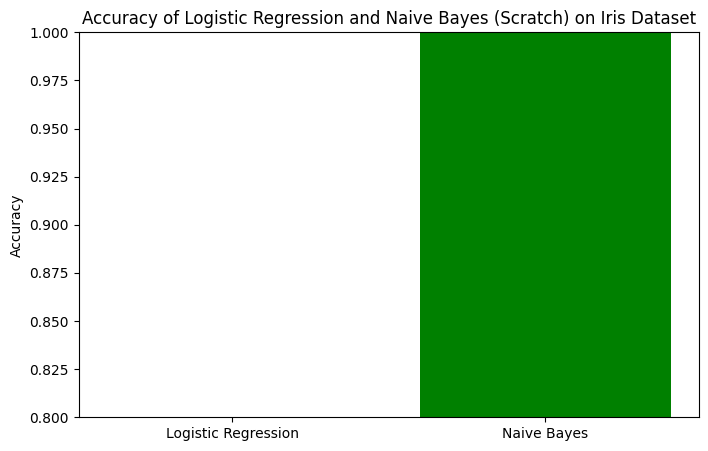

In [10]:
# Plotting
models = ['Logistic Regression', 'Naive Bayes']
accuracies = [logreg_scratch_accuracy, naive_bayes_scratch_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Accuracy of Logistic Regression and Naive Bayes (Scratch) on Iris Dataset')
plt.ylim(0.8, 1.0)
plt.show()

# Readymade library

In [11]:
from sklearn.linear_model import LogisticRegression as LR_sklearn
from sklearn.naive_bayes import GaussianNB as NB_sklearn

# Logistic Regression using scikit-learn
logreg_sklearn = LR_sklearn()
logreg_sklearn.fit(X_train, y_train)
logreg_sklearn_predictions = logreg_sklearn.predict(X_test)
logreg_sklearn_accuracy = accuracy_score(y_test, logreg_sklearn_predictions)
print("Logistic Regression (scikit-learn) Accuracy:", logreg_sklearn_accuracy)

# Naive Bayes using scikit-learn
naive_bayes_sklearn = NB_sklearn()
naive_bayes_sklearn.fit(X_train, y_train)
naive_bayes_sklearn_predictions = naive_bayes_sklearn.predict(X_test)
naive_bayes_sklearn_accuracy = accuracy_score(y_test, naive_bayes_sklearn_predictions)
print("Naive Bayes (scikit-learn) Accuracy:", naive_bayes_sklearn_accuracy)

Logistic Regression (scikit-learn) Accuracy: 1.0
Naive Bayes (scikit-learn) Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
